# EDA (Exploratory data analysis)

### Dependencies & Load Data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
from nltk import ngrams
from nltk.tokenize import word_tokenize

In [2]:
data_train = pd.read_csv('F:\AI Portfolio Project\Project 2-new\datasets\data_train.csv')
data_test = pd.read_csv('F:\AI Portfolio Project\Project 2-new\datasets\data_test.csv')
data_dev = pd.read_csv('F:\AI Portfolio Project\Project 2-new\datasets\data_dev.csv')

In [3]:
#checking csv
data_train.head()

,id,url,clean_article,clean_summary,extractive_summary,combined_clean_article,combined_clean_summary
0,288252,https://www.liputan6.com/news/read/288252/peme...,"[['Liputan6', '.', 'com', ',', 'Jakarta', ':',...","[['Meski', 'belum', 'ada', 'hasil', 'resmi', '...","[4, 5]","Liputan6. com, Jakarta: Hingga kini kerusakan ...",Meski belum ada hasil resmi analisa penyebab k...
1,148249,https://www.liputan6.com/news/read/148249/fred...,"[['Liputan6', '.', 'com', ',', 'Jakarta', ':',...","[['Freddy', 'Santoso', ',', 'pelaku', 'penyuap...","[0, 2]","Liputan6. com, Jakarta: Freddy Santoso, pelaku...","Freddy Santoso, pelaku penyuapan terhadap Iraw..."
2,30242,https://www.liputan6.com/news/read/30242/perke...,"[['Liputan6', '.', 'com', ',', 'Jakarta', ':',...","[['Fotografi', 'mode', 'terus', 'berkembang', ...","[0, 2, 4]","Liputan6. com, Jakarta: Fotografi mode kini se...",Fotografi mode terus berkembang dengan lebih m...
3,198447,https://www.liputan6.com/news/read/198447/pks-...,"[['Liputan6', '.', 'com', ',', 'Subang', ':', ...","[['Seniman', 'Subang', 'menyerukan', 'memboiko...","[2, 6]","Liputan6. com, Subang: Pro kontra tari jaipong...",Seniman Subang menyerukan memboikot PKS dan me...
4,27679,https://www.liputan6.com/news/read/27679/pemda...,"[['Liputan6', '.', 'com', ',', 'Jakarta', ':',...","[['Suku', 'Dinas', 'Kependudukan', 'DKI', 'Jak...","[1, 9, 3]","Liputan6. com, Jakarta: Pemda Jakarta menggela...",Suku Dinas Kependudukan DKI Jakarta menggelar ...


### Remove Column into "combined_clean_article" and "combined_clean_article only"

In [4]:
data_train.drop(columns=['clean_article', 'clean_summary', 'id', 'url', 'extractive_summary'], inplace=True)

In [5]:
#checking after removal
data_train.head()

,combined_clean_article,combined_clean_summary
0,"Liputan6. com, Jakarta: Hingga kini kerusakan ...",Meski belum ada hasil resmi analisa penyebab k...
1,"Liputan6. com, Jakarta: Freddy Santoso, pelaku...","Freddy Santoso, pelaku penyuapan terhadap Iraw..."
2,"Liputan6. com, Jakarta: Fotografi mode kini se...",Fotografi mode terus berkembang dengan lebih m...
3,"Liputan6. com, Subang: Pro kontra tari jaipong...",Seniman Subang menyerukan memboikot PKS dan me...
4,"Liputan6. com, Jakarta: Pemda Jakarta menggela...",Suku Dinas Kependudukan DKI Jakarta menggelar ...


### Word Count & Plotting

#### Word count for both columns

In [6]:

def word_count(sentence):
    sentences = sentence.split()
    return len(sentences)

data_train['total_words_article'] = data_train['combined_clean_article'].apply(word_count)
data_train['total_words_summary'] = data_train['combined_clean_summary'].apply(word_count)
data_train.describe()

,total_words_article,total_words_summary
count,10000.000000,10000.000000
mean,197.456900,27.005200
std,119.667498,6.257531
min,42.000000,11.000000
25%,124.000000,23.000000
50%,166.000000,27.000000
75%,233.000000,30.000000
max,2397.000000,75.000000


#### Plotting

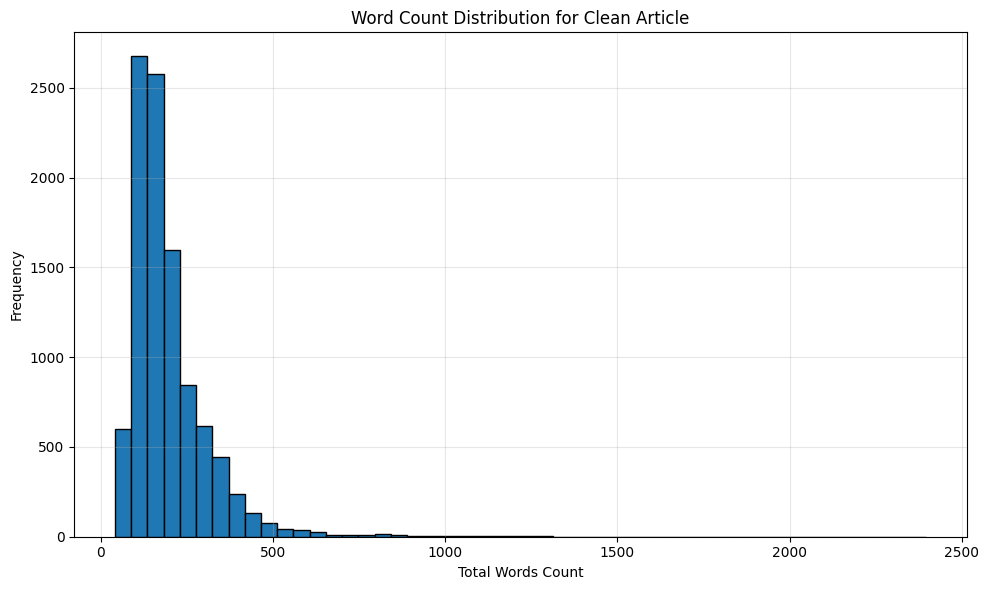

In [9]:
word_count = data_train['combined_clean_article'].str.split().str.len()

plt.figure(figsize=(10, 6))
plt.hist(word_count, bins=50, edgecolor='black')
plt.title('Word Count Distribution for Clean Article')
plt.xlabel('Total Words Count')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


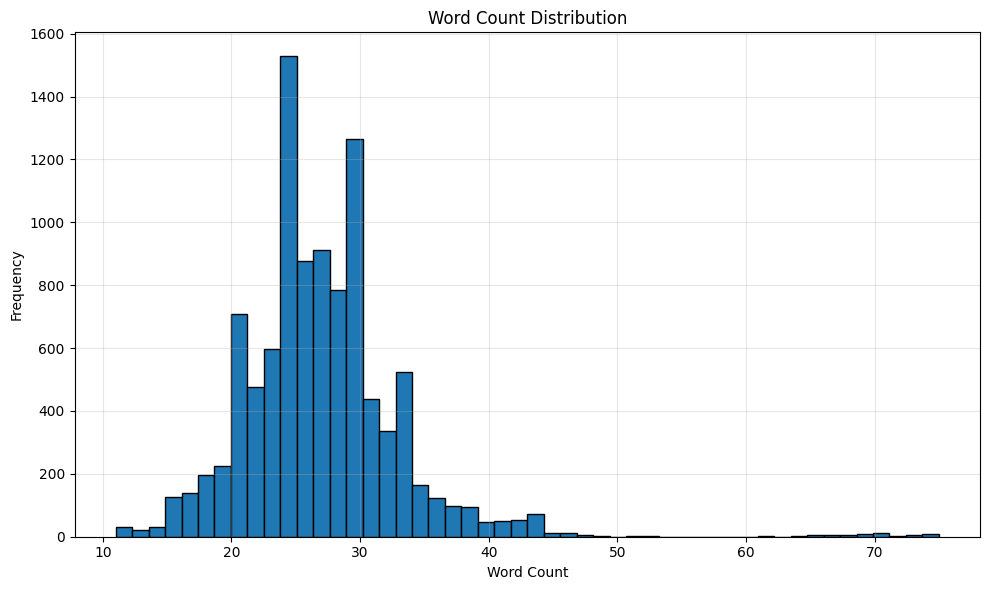

In [10]:
word_count = data_train['combined_clean_summary'].str.split().str.len()

plt.figure(figsize=(10, 6))
plt.hist(word_count, bins=50, edgecolor='black')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### N-gram

Setting Stopwords and Plotting top 10 words - unigram

In [56]:
#Setting stopwords to Indonesia
stop_words = set(stopwords.words('indonesian'))

# Removing stopwords
def remove_stopwords_and_non_alpha(text):
    return [word for word in text if word not in stop_words and word.isalpha()]

# Combining all the texts from 'combined_clean_article'
all_texts = ' '.join(data_train['combined_clean_article'])

# Tokenize all_texts
filtered_words = remove_stopwords_and_non_alpha(word_tokenize(all_texts))

# Count unigram frequencies
word_counts = Counter(filtered_words)

# Get top 10 for unigram
top_10_unigram = word_counts.most_common(10)

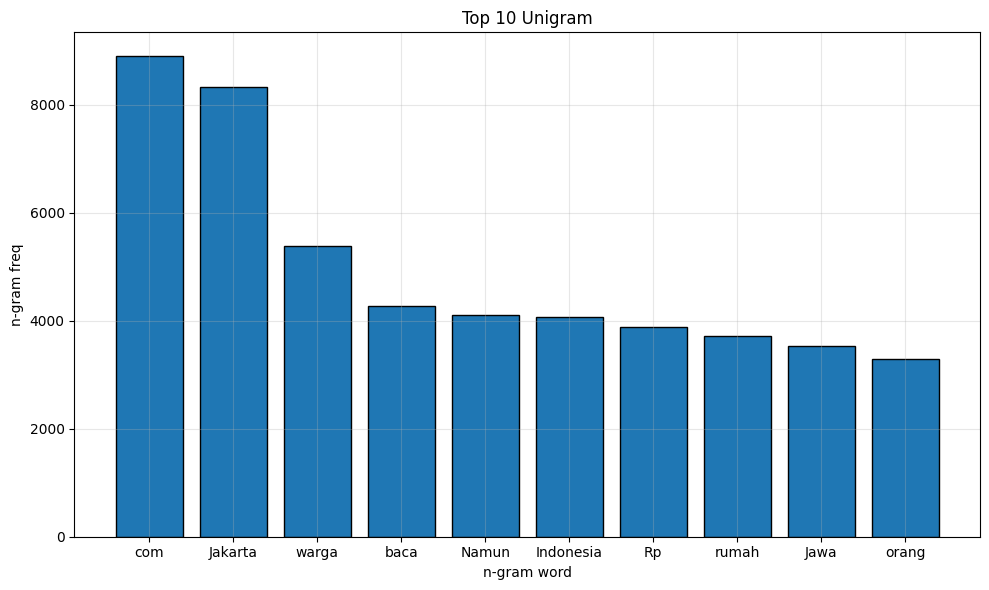

In [57]:
unigram_words, unigram_counts = zip(*top_10_unigram)
plt.figure(figsize=(10, 6))
plt.bar(unigram_words, unigram_counts, edgecolor='black')
plt.xlabel('n-gram word')
plt.ylabel('n-gram freq')
plt.title('Top 10 Unigram')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



Setting Stopwords and Plotting top 10 words - bigram

In [58]:
# Setting stopwords to Indonesia
stop_words = set(stopwords.words('indonesian'))

# Removing stopwords
def remove_stopwords_and_non_alpha(text):
    return [word for word in text if word not in stop_words and word.isalpha()]

# Combining all the texts from 'combined_clean_article'
all_texts = ' '.join(data_train['combined_clean_article'])

# Tokenize all_texts
filtered_words = remove_stopwords_and_non_alpha(word_tokenize(all_texts))

# Generate 2-grams (bigrams)
bigrams = list(ngrams(filtered_words, 2))

# Count bigram frequencies
bigram_counts = Counter(bigrams)

# Get top 10 most common bigrams
top_10_bigrams = bigram_counts.most_common(10)

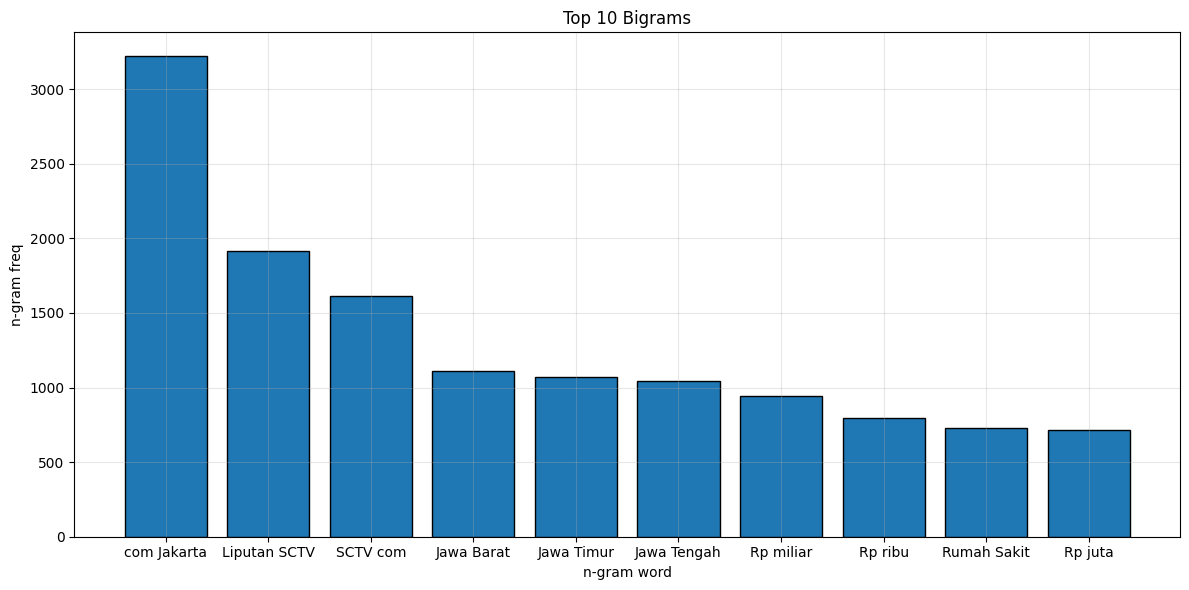

In [62]:
bigram_words = [' '.join(bigram) for bigram, count in top_10_bigrams]
bigram_counts = [count for bigram, count in top_10_bigrams]
plt.figure(figsize=(12, 6))
plt.bar(bigram_words, bigram_counts, edgecolor='black')
plt.xlabel('n-gram word')
plt.ylabel('n-gram freq')
plt.title('Top 10 Bigrams')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Setting Stopwords and Plotting top 10 words - trigram

In [60]:
#Setting stopwords to Indonesia
stop_words = set(stopwords.words('indonesian'))

# Removing stopwords
def remove_stopwords_and_non_alpha(text):
    return [word for word in text if word not in stop_words and word.isalpha()]

# Combine all texts from 'combined_clean_article'
all_texts = ' '.join(data_train['combined_clean_article'])

# Tokenize all_texts
filtered_words = remove_stopwords_and_non_alpha(word_tokenize(all_texts))

# Generate 3-grams (trigrams)
trigrams = list(ngrams(filtered_words, 3))

# Count trigram frequencies
trigram_counts = Counter(trigrams)

# Get top 10 for trigrams
top_10_trigrams = trigram_counts.most_common(10)


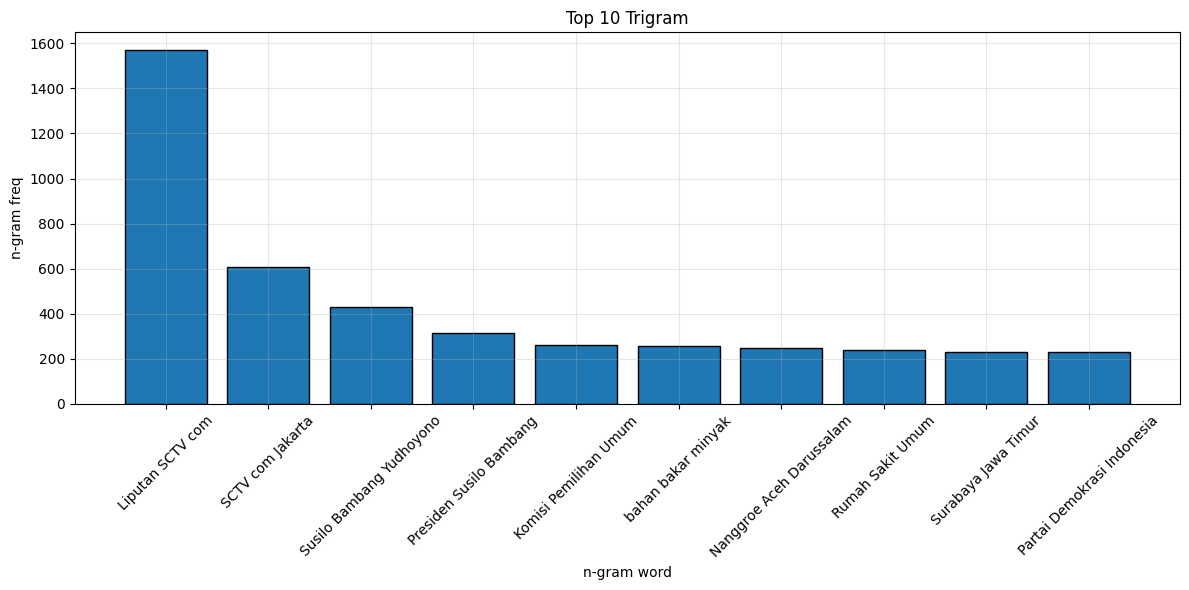

In [61]:
trigram_labels = [' '.join(trigram) for trigram, count in top_10_trigrams]
trigram_counts = [count for trigram, count in top_10_trigrams]
plt.figure(figsize=(12, 6))
plt.bar(trigram_labels, trigram_counts, edgecolor='black')
plt.xlabel('n-gram word')
plt.ylabel('n-gram freq')
plt.title('Top 10 Trigram')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()